<a href="https://colab.research.google.com/github/camilabr74/Estatistica-Analise-Dados-Python/blob/main/9.%20Normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TESTES DE NORMALIDADE**

Vários métodos de estimação e testes de hipóteses foram criados sob a suposição de que a amostra aleatória tenha distribuição normal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
enem_sp = pd.read_csv('/content/drive/MyDrive/programa_formacao/Estatistica_Analise_Dados_Python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
enem_tupa = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Tupã']

In [ ]:
enem_tupa.shape

(524, 28)

In [ ]:
enem_tupa.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
1623,"1,90E+11",Tupã,19,F,1,branca,1,1,não_respondeu,NaN,...,42.7,Inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
2281,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,...,656.8,Inglês,1.0,140.0,140.0,140.0,200.0,180.0,800.0,Sim
5493,"1,90E+11",Tupã,18,F,1,branca,2,2,pública,NaN,...,515.6,Espanhol,1.0,160.0,120.0,140.0,120.0,100.0,640.0,Sim
7465,"1,90E+11",Tupã,19,M,1,branca,1,1,não_respondeu,NaN,...,628.4,Inglês,1.0,140.0,160.0,160.0,180.0,160.0,800.0,Sim
7898,"1,90E+11",Tupã,28,M,1,branca,1,1,não_respondeu,NaN,...,701.5,Inglês,1.0,120.0,160.0,120.0,120.0,140.0,660.0,Sim


TESTES DE NORMALIDADE

Existem testes de normalidade numéricos e testes gráficos:

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

Histograma

QQplot

### Histograma

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_sp,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',)
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação')
grafico.show()

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_tupa,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',)
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação')
grafico.show()

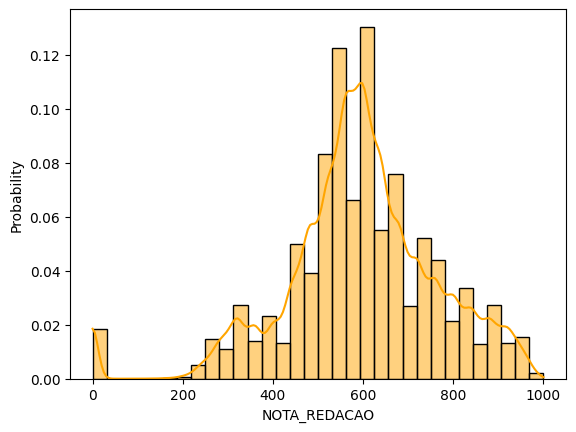

In [ ]:
import seaborn as sns
sns.histplot(enem_sp, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

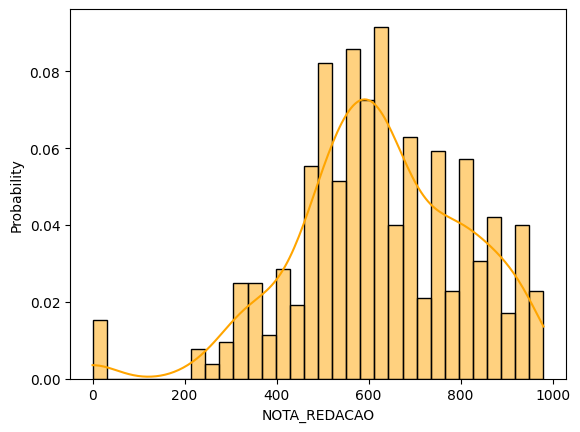

In [ ]:
sns.histplot(enem_tupa, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

### QQPLOT

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

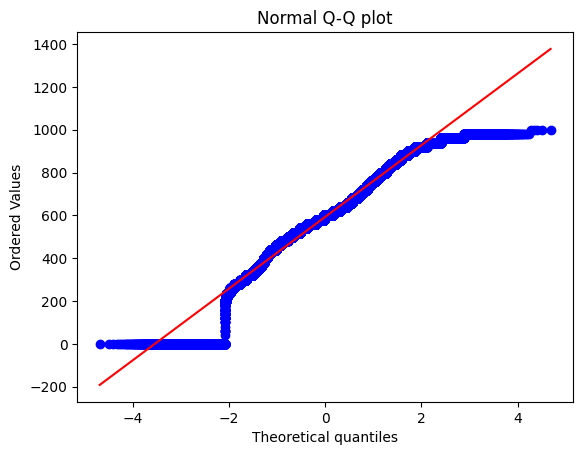

In [ ]:
stats.probplot(enem_sp['NOTA_REDACAO'], dist="norm", plot=plt)
#probplot (nome gráfico), variável, verificar se a dist é normal
plt.title("Normal Q-Q plot")
plt.show()

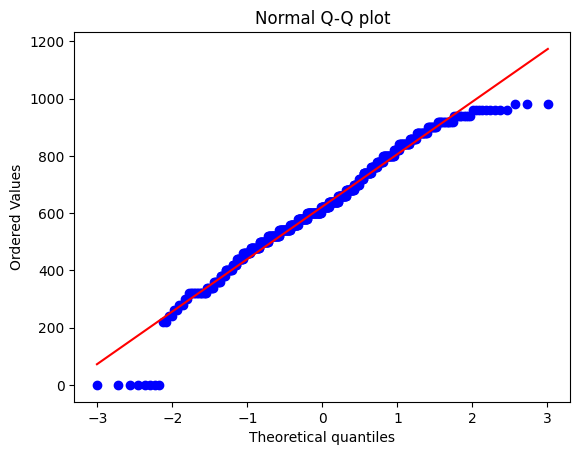

In [ ]:
stats.probplot(enem_tupa['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

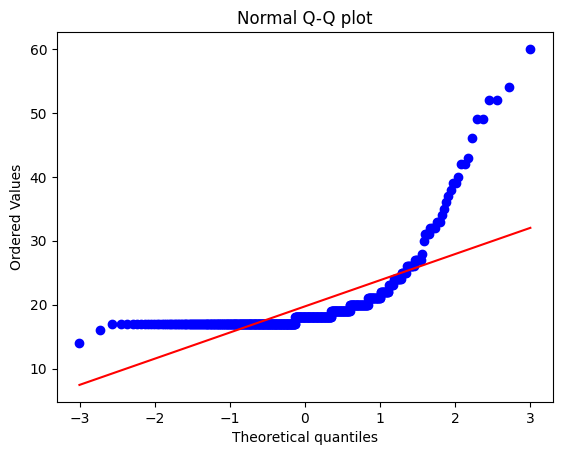

In [ ]:
stats.probplot(enem_tupa['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

(o segundo valor do parâmetro que é o que indica normalização)

In [ ]:
stats.shapiro(enem_sp.NOTA_REDACAO)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9633597135543823, pvalue=0.0)

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [ ]:
stats.shapiro(enem_tupa.NOTA_REDACAO)

ShapiroResult(statistic=0.9733083248138428, pvalue=3.541695647868437e-08)

### Teste Lilliefors (Kolmogorov-Smirnov)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = 'norm')

(0.0831243667968013, 0.0009999999999998899)

In [ ]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(enem_tupa.NOTA_REDACAO, dist = 'norm')

(0.053966451207192984, 0.0020401155999012818)